### Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_excel('glass.xlsx',sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


##### 1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

In [36]:
print(df.shape)

(214, 10)


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [38]:
print(df.columns)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [39]:
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [40]:
print(df.describe)

<bound method NDFrame.describe of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>


#### 2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

#### Histogram

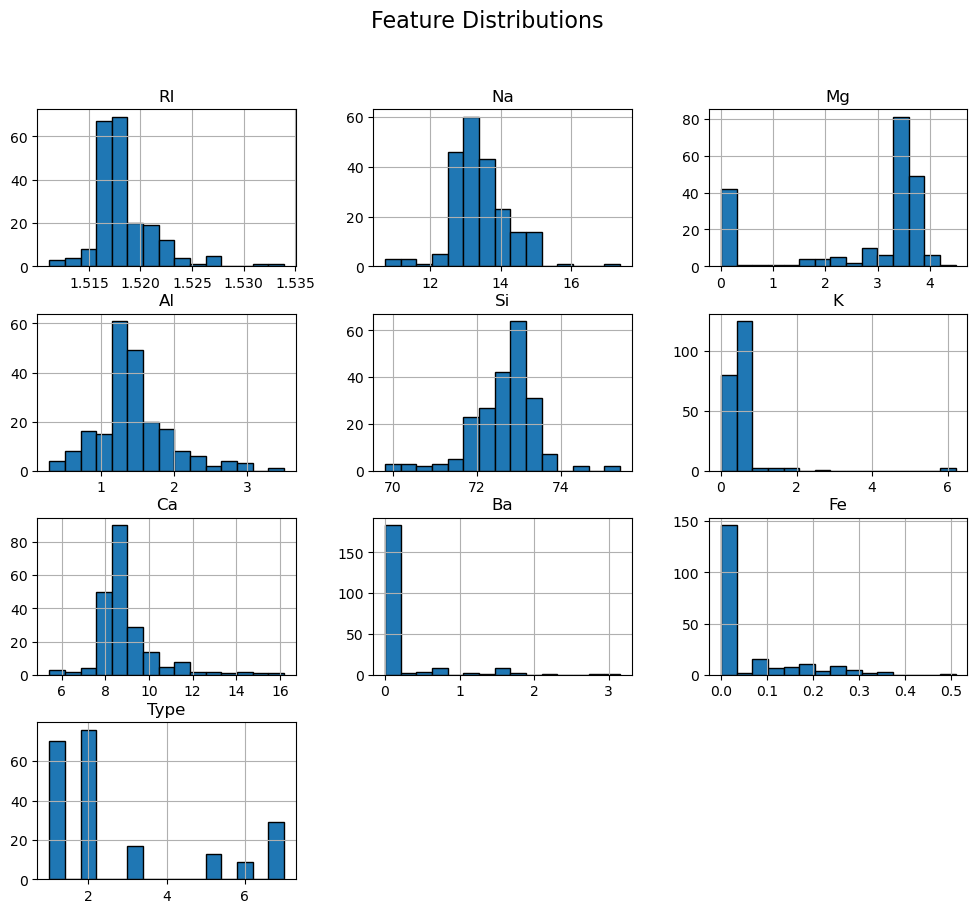

In [41]:
df.hist(figsize=(12,10), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

#### Boxplots

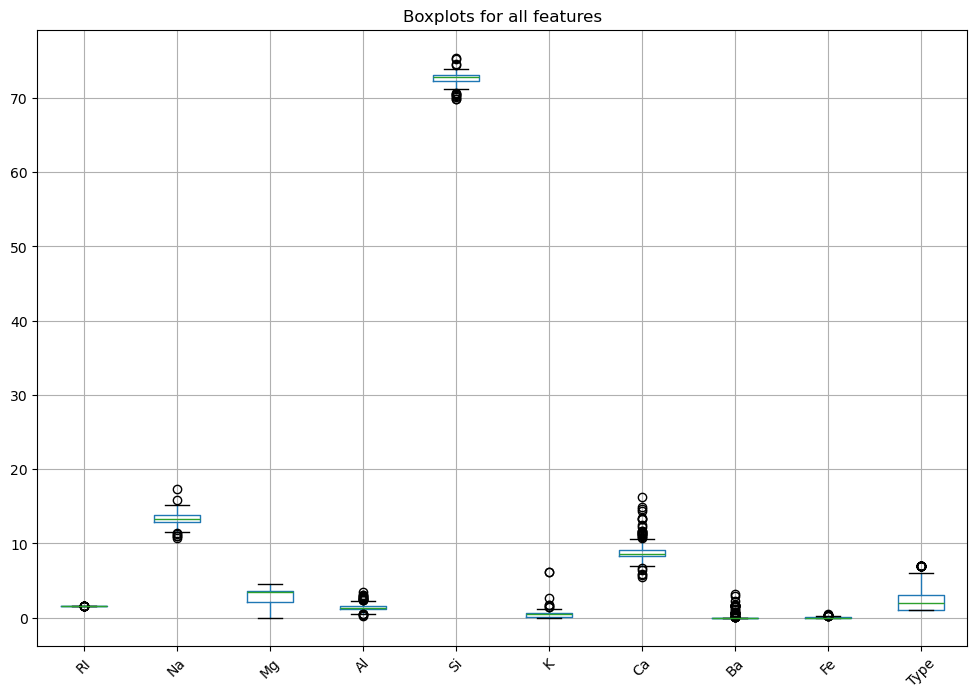

In [42]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.title("Boxplots for all features")
plt.xticks(rotation=45)
plt.show()

#### Correlation heatmap

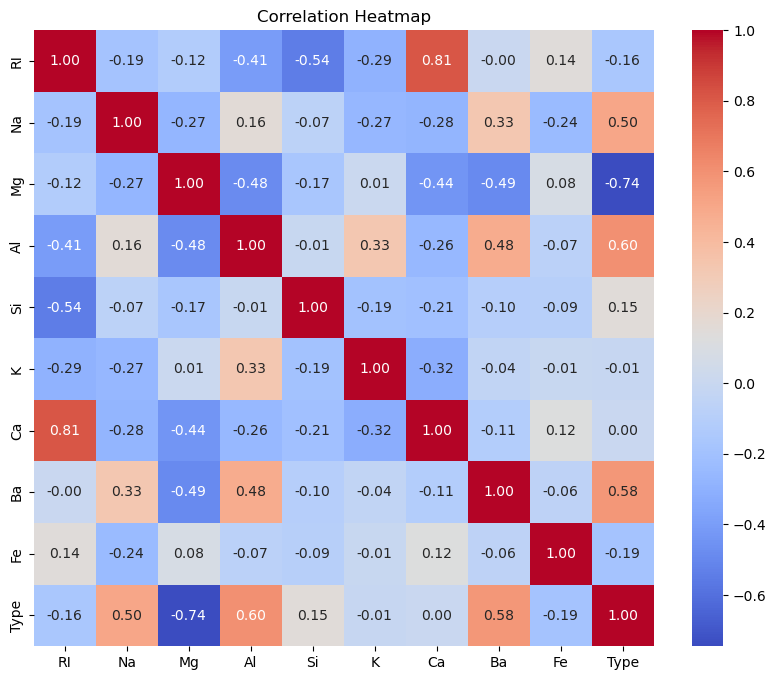

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Pairplot(for feature relationship)

In [ ]:
sns.pairplot(df, hue="Type", palette="tab10")
plt.suptitle("Pairplot of Glass Features by Type", y=1.02)
plt.show()

#### Class distribution plot

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.countplot(x='Type', data=df, palette="viridis")
plt.title("Distribution of Glass Types")
plt.show()

##### interpretation

Features like RI, Na, Si, and Ca show clear variations among glass types.

The dataset is balanced moderately but some glass types have fewer samples.

There are a few outliers visible in Ca and Ba.

The heatmap shows moderate correlations between some chemical components

#### 3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

##### checking missing values

In [ ]:
print(df.isnull().sum())

There are no missing values in the dataset, so no imputation or removal is required

##### Handle cataegorical variables

The dataset contains only numerical columns, so encoding is not necessary

##### Feature scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('Type', axis=1)
y = df['Type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)

* Data split into 80% training 20% testing stes

* StandardScaler standardizes all features to a mean of 0 and standard deviation of 1.

* This ensures all features are on a similar scale.

#### Handle imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

* SMOTE (Synthetic Minority Over-sampling Technique) is used to balance the dataset by generating synthetic examples for minority classes.

#### 4: Random Forest Model Implementation

1. Divide the data into train and test split.

2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,        
    criterion='gini',        
    random_state=42
)


rf_model.fit(X_train, y_train)

* n_estimators=100: builds 100 decision trees.

* criterion='gini': uses Gini impurity to measure splits.

* The model learns patterns from the training data.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y_pred = rf_model.predict(X_test)

# Evaluation metrics
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* Accuracy: Overall correctness.

* Precision: How many predicted positives are correct

* Recall: How many actual positives are identified.

* F1-score: Balance between precision and recall.

* Confusion Matrix: Shows detailed class-wise predictions.

#### 5: Bagging and Boosting Methods

Apply the Bagging and Boosting methods and compare the results.

#### Bagging classifier

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [27]:
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

bag_model.fit(X_train, y_train)

# Predict
y_pred_bag = bag_model.predict(X_test)

# Evaluate
print(" Bagging Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bag))

 Bagging Classifier Results
Accuracy: 0.813953488372093

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.81        43
   macro avg       0.81      0.82      0.80        43
weighted avg       0.82      0.81      0.81        43



#### AdaBoost(Adaptive Boosting)

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
ada_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.8,
    random_state=42
)

ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)

# Evaluate
print(" AdaBoost Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))

 AdaBoost Classifier Results
Accuracy: 0.46511627906976744

Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.64      0.58        14
           2       0.40      0.40      0.40        15
           3       0.00      0.00      0.00         3
           5       0.20      0.33      0.25         3
           6       0.50      0.50      0.50         2
           7       0.75      0.50      0.60         6

    accuracy                           0.47        43
   macro avg       0.40      0.40      0.39        43
weighted avg       0.45      0.47      0.45        43



#### Grading Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate
print(" Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

 Gradient Boosting Results
Accuracy: 0.8372093023255814

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.79      0.81        14
           2       0.81      0.87      0.84        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.84        43
   macro avg       0.86      0.83      0.83        43
weighted avg       0.85      0.84      0.84        43



#### Comparison of all Models

In [32]:
results = {
    "Random Forest": accuracy_score(y_test, y_pred),
    "Bagging": accuracy_score(y_test, y_pred_bag),
    "AdaBoost": accuracy_score(y_test, y_pred_ada),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb)
}

import pandas as pd
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print(results_df)

               Model  Accuracy
0      Random Forest  0.837209
1            Bagging  0.813953
2           AdaBoost  0.465116
3  Gradient Boosting  0.837209


#### Visual comparison

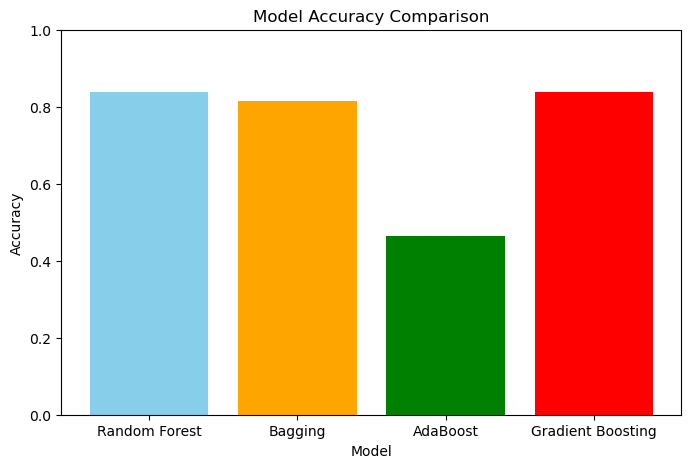

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['Accuracy'], color=['skyblue','orange','green','red'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

##### 1. Explain Bagging and Boosting methods. How is it different from each other.

#### Bagging (Bootstrap Aggregating)

Bagging (Bootstrap Aggregating) is an ensemble learning technique that builds multiple independent models using random subsets of the training data created through sampling with replacement. Each model is trained separately, and the final prediction is made by combining the results of all models, usually by majority voting in classification or averaging in regression. The main aim of bagging is to reduce variance and prevent overfitting, making the model more stable and reliable. A popular example of the bagging method is the Random Forest algorithm.

#### Boosting

Boosting, on the other hand, is an ensemble method that builds models sequentially, where each new model focuses on correcting the errors made by the previous models. It assigns higher weights to the misclassified samples so that the next model learns better from them. The final prediction is obtained by combining all weak learners into a strong learner, typically using weighted voting or summation. The main goal of boosting is to reduce bias and improve the accuracy of predictions. Examples of boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

#### The Difference

The key difference between bagging and boosting is that bagging trains models independently and in parallel, whereas boosting trains them sequentially. Bagging primarily reduces variance, while boosting reduces bias. Bagging uses random sampling with replacement to create subsets of data, whereas boosting gives more importance to difficult or misclassified samples. Overall, bagging creates multiple strong independent models to stabilize predictions, while boosting builds a series of dependent models that progressively improve performance.

##### 2. Explain how to handle imbalance in the data.

#### Handling Imbalance in Data

To handle imbalance in data, various techniques can be applied to ensure that the model performs well for both majority and minority classes. One common method is *resampling, which includes *oversampling the minority class (for example, using SMOTE – Synthetic Minority Over-sampling Technique) or undersampling the majority class to balance the dataset. Another approach is to use *class weighting, where higher weights are assigned to the minority class during model training to reduce bias toward the majority class. Additionally, **ensemble methods* like Random Forests or boosting algorithms such as XGBoost can handle imbalance effectively by focusing more on difficult-to-classify instances. Apart from these, *anomaly detection techniques* and *evaluation metrics* like Precision, Recall, F1-score, and AUC-ROC are also used instead of accuracy, as they provide a better understanding of performance on imbalanced data.